<a href="https://colab.research.google.com/github/alex-smith-uwec/NLP_Spring2025/blob/main/word2vec_baby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [5]:
# Sample corpus
sentences = [
    ["dog", "barks", "at", "the", "moon"],
    ["cat", "meows", "in", "the", "night"],
    ["dog", "chases", "the", "cat"],
    ["moon", "shines", "in", "the", "sky"],
    ["sky", "is", "blue"],
    ["cat", "and", "dog", "are", "friends"]
]


In [6]:

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=10, window=3, min_count=1, workers=4)

# Get similar words
print("Most similar words to 'dog':\n", model.wv.most_similar("dog"))


Most similar words to 'dog':
 [('the', 0.5436006188392639), ('chases', 0.35868826508522034), ('cat', 0.32937225699424744), ('blue', 0.30433881282806396), ('at', 0.23243048787117004), ('and', 0.13983877003192902), ('meows', 0.03522605448961258), ('are', 0.03376543149352074), ('barks', -0.1799871176481247), ('in', -0.2113765925168991)]


In [8]:
# prompt: give me coordinates of the vector for "dog'

# Get the vector for the word "dog"
dog_vector = model.wv["dog"]

# Print the coordinates
print("Coordinates of the vector for 'dog':\n", dog_vector)


Coordinates of the vector for 'dog':
 [ 0.07380505 -0.01533471 -0.04536613  0.06554051 -0.0486016  -0.01816018
  0.0287658   0.00991874 -0.08285215 -0.09448818]


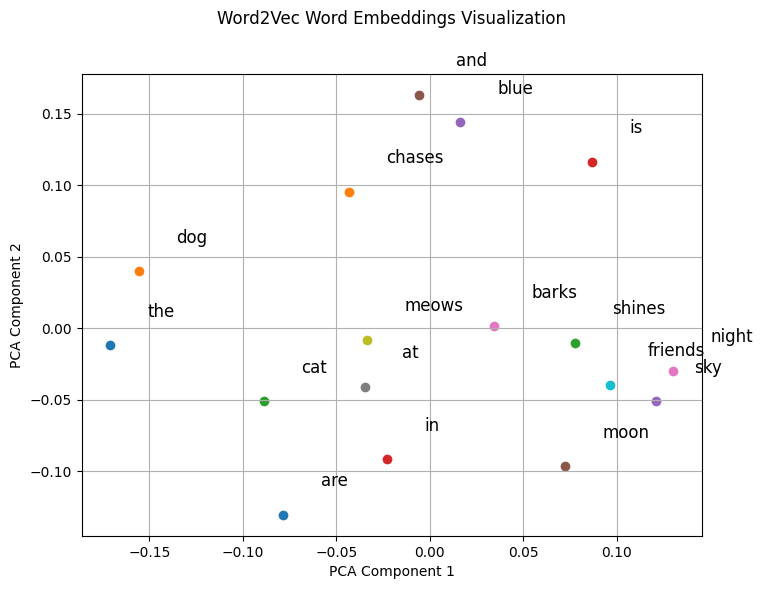

In [11]:

# Extract word vectors for visualization
words = list(model.wv.key_to_index.keys())
word_vectors = [model.wv[word] for word in words]

# Reduce dimensions using PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot the words in 2D
plt.figure(figsize=(8,6))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.text(word_vectors_2d[i, 0]+0.02, word_vectors_2d[i, 1]+0.02, word, fontsize=12)

plt.title("Word2Vec Word Embeddings Visualization\n\n")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()
